#**GDG TASK 2**

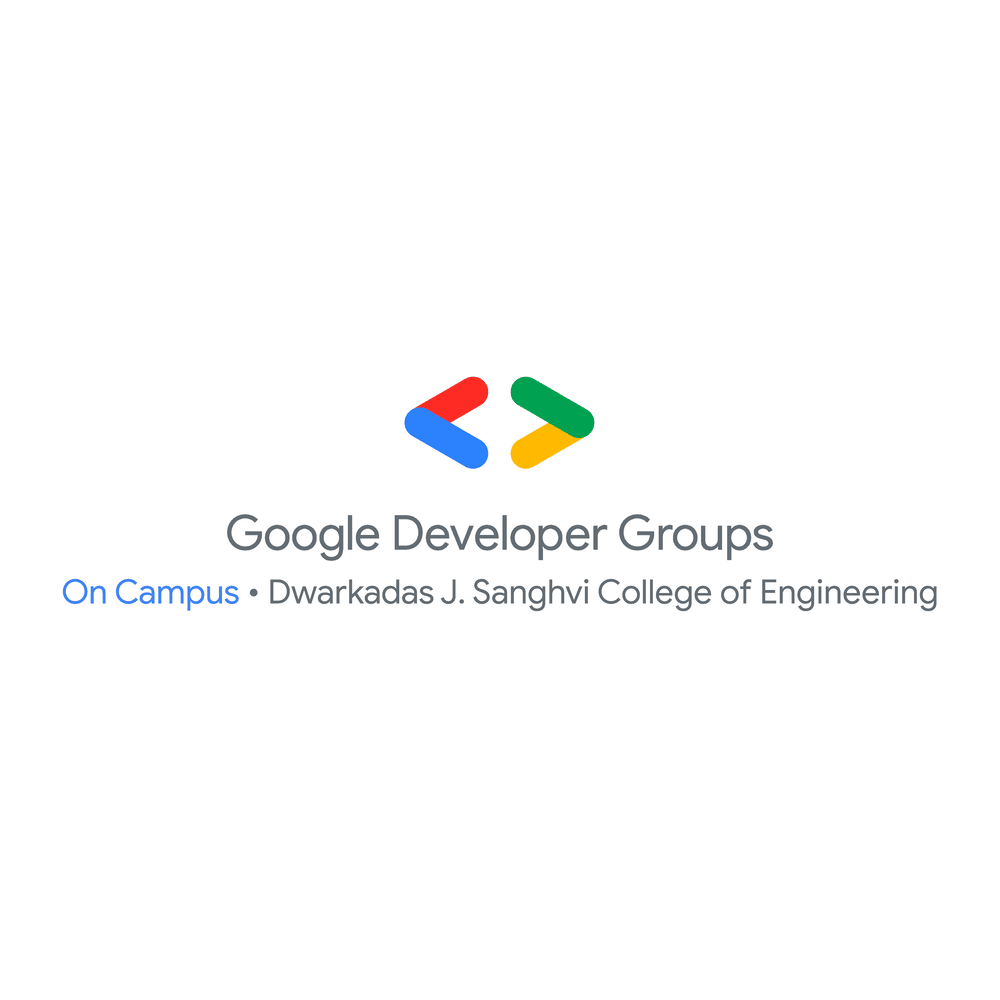

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding.

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [1]:
!pip install shap -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read dataset into a variable
df = pd.read_csv('/content/drive/MyDrive/GDG_ML_Tasks/Task1.csv')

In [ ]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [6]:
# Your code ends here
df = df.drop(columns=['id'])
df = df[df['Height'] != 0]
df['LostWeight'] = df['Weight'] - (
    df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight']
)

df['LostWeight'] = df['LostWeight'].apply(lambda x: 0 if x < 0 else 1)
df = pd.get_dummies(df, columns=['Sex'])


If all is correct, this should be the shape of your df now.

In [7]:
df.shape

(74027, 12)

In [8]:
df['Sex_F'] = df['Sex_F'].astype(int)
df['Sex_M'] = df['Sex_M'].astype(int)
df['Sex_I'] = df['Sex_I'].astype(int)
#make the bool columns into num

In [9]:
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,LostWeight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1,0,1,0


###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

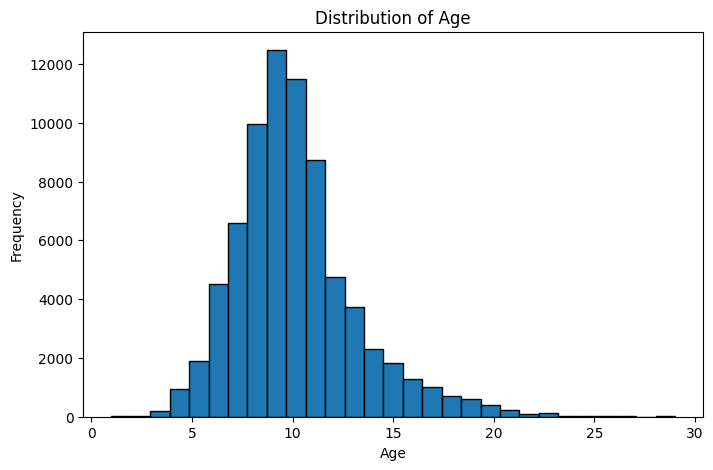

In [10]:
# Your code starts here
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=29, edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [11]:
# Your code starts here
y=df[['Age']]
x=df.drop(columns='Age')

# Your code ends here

In [12]:
y.isnull().sum()

,0
Age,0


In [ ]:
# This code should print (74003, 11) and (74003, 1) if everything is correct


In [13]:
x.shape

(74027, 11)

In [14]:
y.shape

(74027, 1)

In [15]:
#Print a few records of X
x.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,LostWeight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0,1,0


In [16]:
#Print a few records of y
y.head()

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [17]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [18]:
# Your code starts here

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [19]:
# Your code starts here

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# Your code ends here

(51818, 11)
(22209, 11)
(51818, 1)
(22209, 1)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [20]:
# Add your import statement here

from sklearn.svm import SVR as svr

# Create an SVR object 'svr' by calling SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [21]:
svr = svr(kernel='rbf')


In [22]:
# Your code starts here
svr.fit(X_train, y_train)
# Your code ends here

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22201,) if everything is correct.

In [23]:
# Your code starts here
predictions = svr.predict(X_test)
# Your code ends here

In [24]:
print(type(predictions))
print(predictions.shape)


<class 'numpy.ndarray'>
(22209,)


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

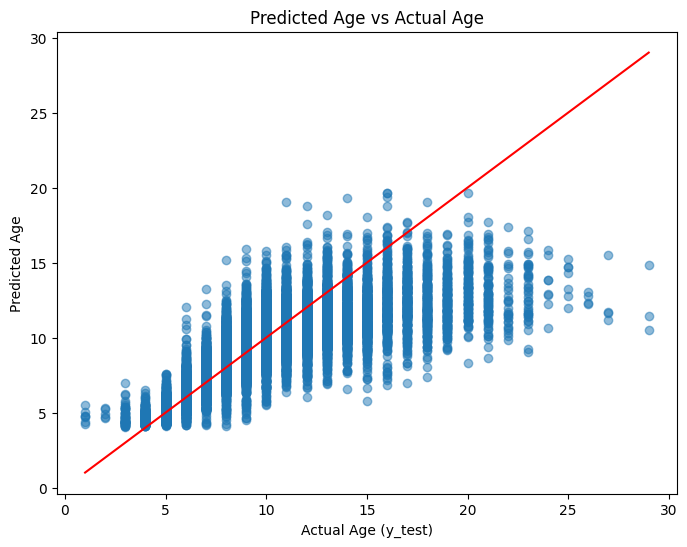

In [25]:
# Your code starts here
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Age (y_test)")
plt.ylabel("Predicted Age")
plt.title("Predicted Age vs Actual Age")


plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [26]:
# Your code starts here
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(round(r2, 3))
# Your code ends here

0.551


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

An R² score of 0.54 means the model explains 54% of the variance in the target variable, leaving 46% unexplained. This indicates moderate performance—better than random guessing but far from ideal.




In [30]:
#Explore additional metrics here


# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(round(mae, 3))


2.102
1.388


In [31]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(round(mse, 3))


4.417


In [32]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(round(rmse, 3))

2.102


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

**1. XGBoost Regressor**

**How it works**: XGBoost is an ensemble method based on decision trees. It builds trees sequentially, where each tree corrects the errors of the previous ones, and uses gradient descent to minimize errors efficiently.

    Best scenario:


**2. Random Forest Regressor**

**How it works**: An ensemble method that constructs multiple decision trees during training. It combines their outputs averages them to improve prediction accuracy and control overfitting.

    Best scenario:


**3. Ridge Regressor**

**How it works**: A type of linear regression that adds an L2 regularization term to the cost function, penalizing large coefficients to prevent overfitting.

    Best scenario:

###Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [27]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

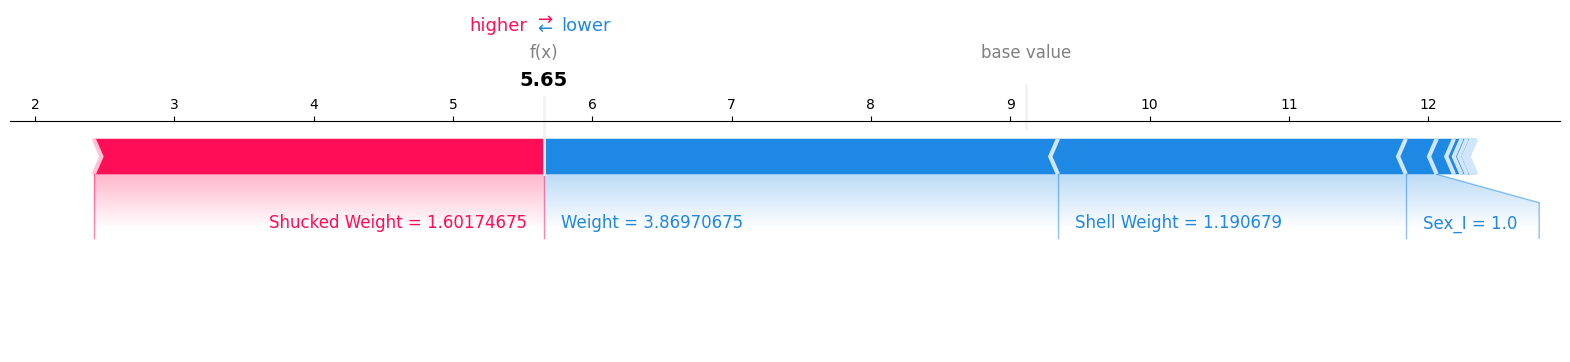

In [28]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1LlLZM-DCdajm9-EakRLM7qJSYQghJZUW/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [37]:
from google.colab import files
uploaded = files.upload()


Saving classified_data.txt to classified_data.txt


In [40]:
ds = pd.read_csv('classified_data.txt', index_col=0)
ds.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [41]:
#info()
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [42]:
#describe()
ds.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

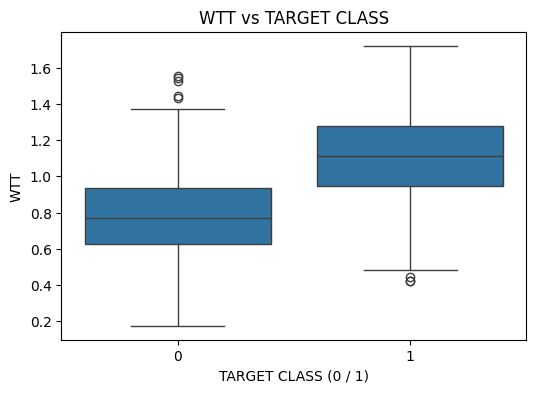

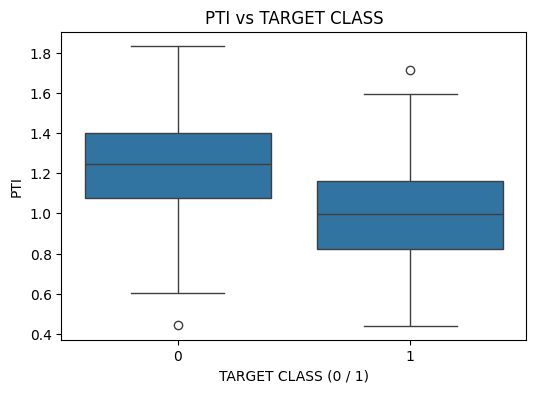

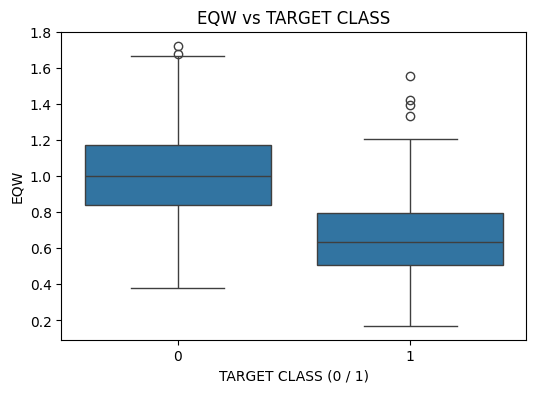

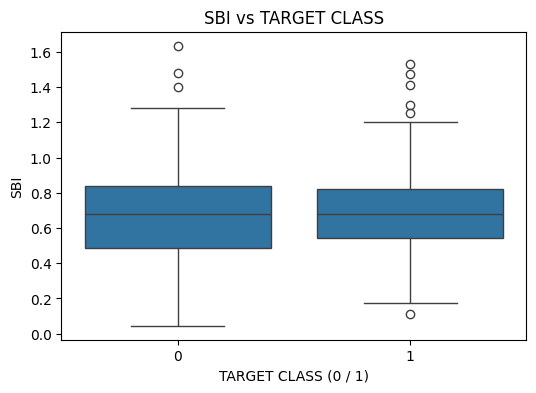

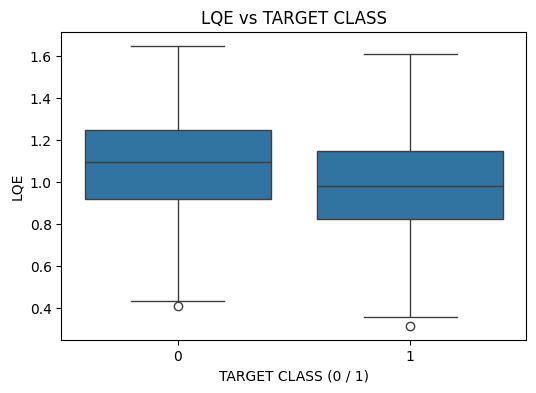

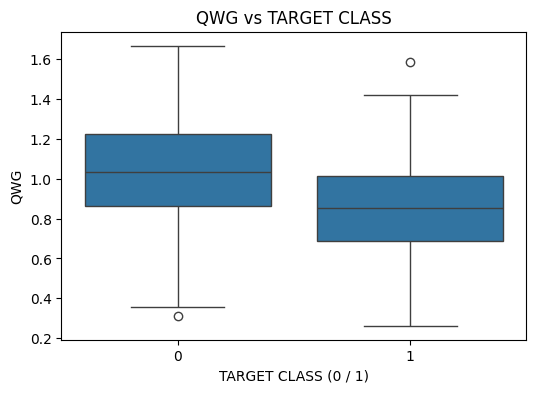

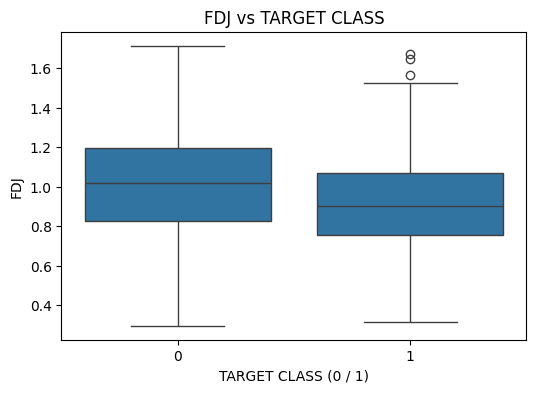

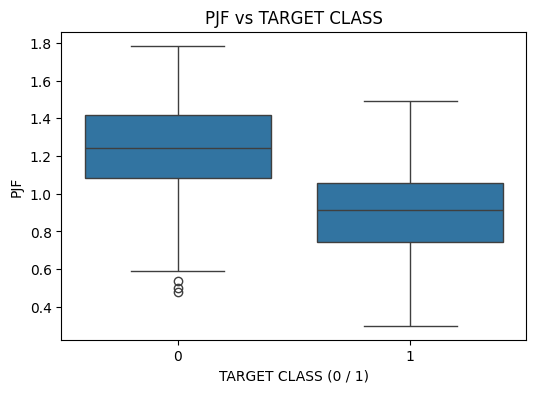

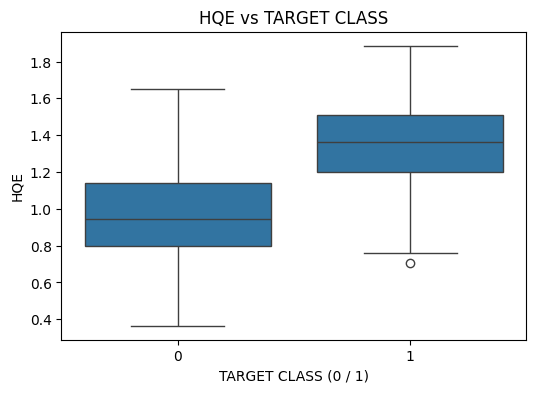

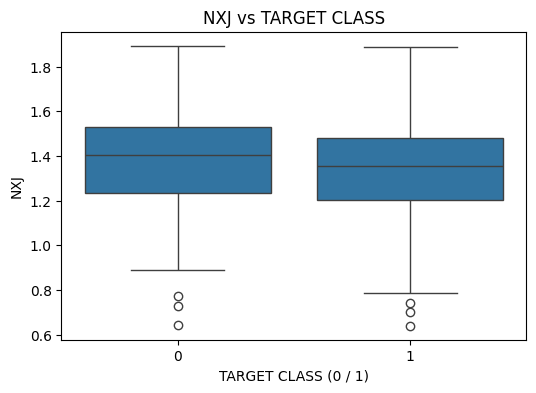

In [43]:
# your code starts here
features = df.columns.drop('TARGET CLASS')

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='TARGET CLASS', y=feature, data=df)
    plt.title(f'{feature} vs TARGET CLASS')
    plt.xlabel('TARGET CLASS (0 / 1)')
    plt.ylabel(feature)
    plt.show()


# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

Text here

Several features show clear distributional differences between the two classes, indicating good discriminative power.


Strongly separating features are EQW, PJF, HQE, PTI, and QWG, where medians are well separated and overlap is minimal.


Moderately useful features include WTT, LQE, and FDJ; these show a visible shift in medians but still have some overlap.


Weak features are SBI and NXJ, as their distributions for both classes overlap heavily with nearly identical medians.


Overall, the dataset contains enough informative features to support effective classification, which explains why models like SVM or KNN perform well on this data.

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [46]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [47]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']


In [50]:
# your code starts here
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)
# your code ends here

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [51]:
# your code starts here
# Convert scaled array back to DataFrame
df_feat = pd.DataFrame(X_scaled, columns=X.columns)

df_feat.head()

# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [52]:
# Your code starts here.
X = df_feat
y = df['TARGET CLASS']

# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [53]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [54]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [55]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [56]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [57]:
# Your code starts here.
accuracy = np.mean(pred == y_test)
print(round(accuracy, 3))
# Your code ends here

0.937


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [58]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier

accuracy_list = []

for n in range(1, 61):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    pred_n = knn.predict(X_test)
    acc = np.mean(pred_n == y_test)

    accuracy_list.append(acc)

# Your code ends here

**Plot a graph of K value vs Accuracy**

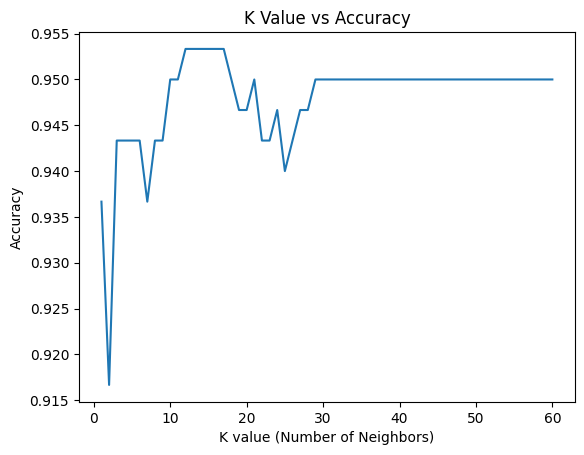

In [59]:
# Your code starts here.
k_values = range(1, 61)

plt.figure()
plt.plot(k_values, accuracy_list)
plt.xlabel("K value (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy")
plt.show()

# Your code ends here


**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [60]:
# Your code starts here.
acc_array = np.array(accuracy_list)
best_k = acc_array.argmax() + 1
best_accuracy = acc_array.max()
print("Best value of n_neighbors:", best_k)
print("Accuracy at best K:", round(best_accuracy, 3))
# Your code ends here

Best value of n_neighbors: 12
Accuracy at best K: 0.953


In [ ]:
# Reasons:
      #This value of n_neighbors gives the highest accuracy on the test data among all values from 1 to 60.
      #Very small values of K (e.g., K = 1) create unstable decision boundaries and tend to overfit the training data.
      #Very large values of K smooth the decision boundary too much, leading to underfitting.
      #The chosen K provides the best bias–variance trade-off, resulting in better generalization to unseen data.

# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.


Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**.
Happy coding! :)



## Reinforcement Learning: Teaching Machines Through Experience


Reinforcement Learning (RL) is a branch of Machine Learning where an **agent learns by interacting with an environment** and improving its behavior through trial and error. Instead of learning from labeled data, the agent learns from the **consequences of its actions**, guided by rewards and penalties.


### Core Idea


The main goal of Reinforcement Learning is to **learn a policy** (a strategy) that maximizes cumulative reward over time. At each step, the agent:


1. Observes the current state of the environment
2. Takes an action
3. Receives a reward
4. Moves to a new state


This loop continues until the task is completed or terminated.


### Key Components


* **Agent**: The learner or decision-maker

* **Environment**: Everything the agent interacts with

* **State (S)**: Current situation of the agent

* **Action (A)**: Choices available to the agent

* **Reward (R)**: Feedback signal indicating success or failure

* **Policy (π)**: Mapping from states to actions


### Exploration vs Exploitation


A central challenge in RL is balancing:


* **Exploration**: Trying new actions to discover better rewards

* **Exploitation**: Using known actions that already give high rewards


Too much exploration wastes time, while too much exploitation can lead to suboptimal solutions.


### Popular Reinforcement Learning Algorithms


* **Q-Learning**: Learns the value of actions without needing a model of the environment
* **SARSA**: Similar to Q-learning but updates values based on the agent’s actual actions
* **Policy Gradient Methods**: Directly optimize the policy
* **Deep Q-Networks (DQN)**: Combine deep learning with Q-learning (used by DeepMind)


### Applications of Reinforcement Learning


* **Game Playing**: AlphaGo, chess engines, video games
* **Robotics**: Path planning, object manipulation
* **Self-driving Cars**: Decision-making and control
* **Finance**: Portfolio optimization and trading strategies
* **Recommendation Systems**: Adaptive personalization


### Advantages


* Works well in **dynamic and uncertain environments**
* Does not require labeled datasets
* Learns optimal behavior over time


### Limitations


* Computationally expensive
* Requires large amounts of training data (experience)
* Designing reward functions is challenging


### Conclusion


Reinforcement Learning mimics how humans and animals learn from experience. While it is powerful and widely used in advanced AI systems, it remains complex and resource-intensive. As computing power and algorithms improve, RL is expected to play an even bigger role in building intelligent, autonomous systems.


## Oversampling and Undersampling: Handling Imbalanced Data in Machine Learning

In real-world machine learning problems, datasets are often **imbalanced**, meaning one class has significantly more samples than the other. This imbalance can cause models to become biased toward the majority class, leading to misleading accuracy. **Oversampling and Undersampling** are two widely used techniques to address this issue.

### Why Class Imbalance Is a Problem

When data is imbalanced:

* Models tend to **favor the majority class**
* Minority class predictions suffer from **low recall**
* Accuracy alone becomes an unreliable metric

For example, in fraud detection, fraudulent transactions are rare, but detecting them correctly is critical.

---

## Oversampling

**Oversampling** increases the number of samples in the **minority class** to balance the dataset.

### Common Oversampling Techniques

* **Random Oversampling**: Randomly duplicates minority class samples
* **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic data points instead of duplicating existing ones
* **ADASYN**: Creates more synthetic samples in difficult regions

### Advantages

* Preserves all majority class data
* Improves minority class recall
* Useful when data is limited

### Disadvantages

* Risk of **overfitting**, especially with random duplication
* Increased training time due to larger dataset

---

## Undersampling

**Undersampling** reduces the number of samples in the **majority class** to balance the dataset.

### Common Undersampling Techniques

* **Random Undersampling**: Randomly removes majority class samples
* **Tomek Links**: Removes overlapping samples near decision boundaries
* **NearMiss**: Keeps majority samples closest to minority samples

### Advantages

* Faster training due to smaller dataset
* Reduces bias toward majority class
* Simpler models

### Disadvantages

* Loss of potentially valuable information
* May lead to **underfitting**

---

## Oversampling vs Undersampling

| Aspect        | Oversampling   | Undersampling       |
| ------------- | -------------- | ------------------- |
| Data Size     | Increases      | Decreases           |
| Risk          | Overfitting    | Information loss    |
| Training Time | Higher         | Lower               |
| Best Use Case | Small datasets | Very large datasets |

---

## Best Practices

* Always apply sampling **only on training data**, not test data
* Combine with **proper evaluation metrics** (precision, recall, F1-score)
* Try **hybrid approaches** (e.g., SMOTE + Tomek Links)

---

## Conclusion

Oversampling and undersampling are essential tools for dealing with class imbalance. Oversampling helps when data is scarce, while undersampling is effective when datasets are large. Choosing the right technique depends on the problem, dataset size, and the cost of misclassification.

Understanding and applying these techniques properly leads to **fairer, more reliable machine learning models**.



# **End of Task**


